In [8]:
#1. Identify pockets in San Francisco with a high concentration of active businesses. 
#Please provide visualization(s) to support your analysis.
# Loading complete data 
import pandas as pd
df1 = pd.read_csv("/Users/rinkishah/Downloads/sf_business_dataset.csv", encoding = "ISO-8859-1")
df1.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source Zipcode,Business Start Date,Business End Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37..."
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(..."
2,0026883-13-001,26883,Chevron Texaco Corp,Chevron,3675 Geary Blvd,San Francisco,CA,94118.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,"3675 GEARY BLVD\rSan Francisco, CA 94118\r(37...."
3,0026883-15-001,26883,Chevron Texaco Corp,Chevron,2301 Lombard St,San Francisco,CA,94123.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,"2301 LOMBARD ST\rSan Francisco, CA 94123\r(37...."
4,0026883-16-001,26883,Chevron Texaco Corp,Chevron,1288 19th St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,10.0,Potrero Hill,NaN,"1288 19TH ST\rSan Francisco, CA 94107\r(37.761..."


In [9]:
# Filtering active Business 

df1.rename(columns={'Business End Date': 'Business_End_Date'}, inplace=True)
df1.rename(columns={'Location End Date': 'Location_End_Date'}, inplace=True)
df1.rename(columns={'Source Zipcode': 'Source_Zipcode'}, inplace=True)

df2 = df1[(df1['Business_End_Date'].isnull()) 
          & (df1['Location_End_Date'].isnull())]
df2.head(5)

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source_Zipcode,Business Start Date,Business_End_Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37..."
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(..."
2,0026883-13-001,26883,Chevron Texaco Corp,Chevron,3675 Geary Blvd,San Francisco,CA,94118.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,"3675 GEARY BLVD\rSan Francisco, CA 94118\r(37...."
3,0026883-15-001,26883,Chevron Texaco Corp,Chevron,2301 Lombard St,San Francisco,CA,94123.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,"2301 LOMBARD ST\rSan Francisco, CA 94123\r(37...."
4,0026883-16-001,26883,Chevron Texaco Corp,Chevron,1288 19th St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,10.0,Potrero Hill,NaN,"1288 19TH ST\rSan Francisco, CA 94107\r(37.761..."


In [10]:
# (df1.State == 'CA') & (df1.City == 'San Francisco')  -- tried this but San Francisco is not clean data. 
#It is spelled differently at lot of places. So will go forward with zipcode field instead.
# zipcode field is non-null float64 data type. convert it to string object datatype to carry out further operations.
# total entries in df2 is 156403. Out of these if we filter by zipcode we have 156347 values which are not null
#to filter from. So we still have 56 null records of zipcode where we need to check if city is San Francisco.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156403 entries, 0 to 216648
Data columns (total 26 columns):
Location Id                            156403 non-null object
Business Account Number                156403 non-null int64
Ownership Name                         156403 non-null object
DBA Name                               156403 non-null object
Street Address                         156401 non-null object
City                                   156207 non-null object
State                                  155888 non-null object
Source_Zipcode                         156347 non-null float64
Business Start Date                    156403 non-null object
Business_End_Date                      0 non-null object
Location Start Date                    156403 non-null object
Location_End_Date                      0 non-null object
Mail Address                           156402 non-null object
Mail City                              156369 non-null object
Mail Zipcode                   

In [11]:
#These are 56 rows with null zipcode values where separately we will have to check by city name if it is San Francisco
df4 = df2[(df2['Source_Zipcode'].isnull())]
df4.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source_Zipcode,Business Start Date,Business_End_Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
8151,0150097-09-999,150097,Hartmann Studios Incorporated,Green Valley Plant Rental,100 W Ohio Ave,NaN,NaN,NaN,3/1/1993,NaN,...,7100-7199,"Arts, Entertainment, and Recreation",False,False,NaN,NaN,NaN,NaN,NaN,"100 W OHIO AVE\r(37.930849, -122.37038)"
54495,0420839-01-999,420839,Ascencion Flores Ismael O,Big Noah Hauling,10412 Arcata Ct,NaN,NaN,NaN,8/17/2007,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"10412 ARCATA CT\r(38.049907, -121.364639)"
98911,0482399-01-999,482399,Vip Plumbing And Drain Cleanin,Vip Plumbing And Drain Cleanin,4020 Payne Rd,NaN,NaN,NaN,8/19/2013,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"4020 PAYNE RD\r(37.680122, -121.909452)"
103202,0486766-01-999,486766,Red Oxygen Inc,Red Oxygen Pty Ltd,445 Upper Edward St 39,NaN,NaN,NaN,1/17/2014,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"445 UPPER EDWARD ST\r(42.419657, -90.423607)"
107184,0490549-01-999,490549,Pointclickcare,Pointclickcare,6975 Creditview Rd 4,"Mississauga,+on+canada",NaN,NaN,8/1/2013,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Converting ZipCode field to string datatype to carry out further operations
df2['Source_Zipcode'] = df2['Source_Zipcode'].astype(str)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156403 entries, 0 to 216648
Data columns (total 26 columns):
Location Id                            156403 non-null object
Business Account Number                156403 non-null int64
Ownership Name                         156403 non-null object
DBA Name                               156403 non-null object
Street Address                         156401 non-null object
City                                   156207 non-null object
State                                  155888 non-null object
Source_Zipcode                         156403 non-null object
Business Start Date                    156403 non-null object
Business_End_Date                      0 non-null object
Location Start Date                    156403 non-null object
Location_End_Date                      0 non-null object
Mail Address                           156402 non-null object
Mail City                              156369 non-null object
Mail Zipcode                    

In [14]:
df3 = df2[df2['Source_Zipcode'].str.contains('941')]
df3.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source_Zipcode,Business Start Date,Business_End_Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37..."
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(..."
2,0026883-13-001,26883,Chevron Texaco Corp,Chevron,3675 Geary Blvd,San Francisco,CA,94118.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,"3675 GEARY BLVD\rSan Francisco, CA 94118\r(37...."
3,0026883-15-001,26883,Chevron Texaco Corp,Chevron,2301 Lombard St,San Francisco,CA,94123.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,"2301 LOMBARD ST\rSan Francisco, CA 94123\r(37...."
4,0026883-16-001,26883,Chevron Texaco Corp,Chevron,1288 19th St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,10.0,Potrero Hill,NaN,"1288 19TH ST\rSan Francisco, CA 94107\r(37.761..."


In [15]:
# to find pockets we will group by zipcode
pockets = df3.groupby('Source_Zipcode')
pockets.head()

,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source_Zipcode,Business Start Date,Business_End_Date,...,NAICS Code,NAICS Code Description,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37..."
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(..."
2,0026883-13-001,26883,Chevron Texaco Corp,Chevron,3675 Geary Blvd,San Francisco,CA,94118.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,"3675 GEARY BLVD\rSan Francisco, CA 94118\r(37...."
3,0026883-15-001,26883,Chevron Texaco Corp,Chevron,2301 Lombard St,San Francisco,CA,94123.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,"2301 LOMBARD ST\rSan Francisco, CA 94123\r(37...."
4,0026883-16-001,26883,Chevron Texaco Corp,Chevron,1288 19th St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,10.0,Potrero Hill,NaN,"1288 19TH ST\rSan Francisco, CA 94107\r(37.761..."
5,0026883-17-001,26883,Chevron Texaco Corp,Chevron,1000 Harrison St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"1000 HARRISON ST\rSan Francisco, CA 94107\r(37..."
6,0026883-19-001,26883,Chevron Texaco Corp,Chevron,1198 Valencia St,San Francisco,CA,94110.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,8.0,Mission,NaN,"1198 VALENCIA ST\rSan Francisco, CA 94110\r(37..."
7,0026883-20-001,26883,Chevron Texaco Corp,Chevron,1100 Junipero Serra Blvd,San Francisco,CA,94132.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"1100 JUNIPERO SERRA BLVD\rSan Francisco, CA 94..."
8,0026883-21-001,26883,Chevron Texaco Corp,Chevron,2500 California St,San Francisco,CA,94115.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Pacific Heights,NaN,"2500 CALIFORNIA ST\rSan Francisco, CA 94115\r(..."
9,0026883-26-001,26883,Chevron Texaco Corp,Chevron Corporation,345 California St,San Francisco,CA,94104.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"345 CALIFORNIA ST\rSan Francisco, CA 94104\r(3..."


In [16]:
# Zipcode (Pockets) with high concentration of business
df5 = pockets.size().sort_values(ascending = False)
df5.head()

Source_Zipcode
94110.0    9379
94103.0    8444
94107.0    7276
94109.0    7237
94102.0    6329
dtype: int64

In [20]:
# Top 10 Zipcode (Pockets) with high concentration of business
df6 = df5.head(10)
df6

Source_Zipcode
94110.0    9379
94103.0    8444
94107.0    7276
94109.0    7237
94102.0    6329
94118.0    5436
94122.0    5406
94112.0    5176
94124.0    5143
94111.0    5119
dtype: int64

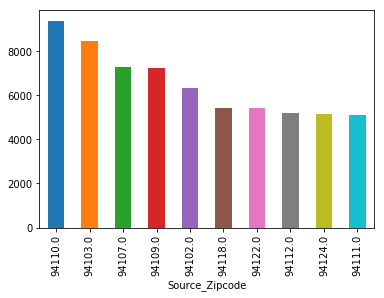

In [19]:
#Map Geoplot would have been better visualization.
%matplotlib inline
df6.plot.bar()

In [18]:
#2. To promote growth in less popular industries in San Francisco, the county is offering a tax break for new businesses
#in these categories to encourage them set up shop in San Francisco. Identify the NAICS code and description of 
#businesses that would benefit from this scheme

# df3 contains active business in San francisco. We need to group df3 by NAICS code and description.

df3.rename(columns={'NAICS Code': 'NAICSCode'}, inplace=True)
df3.rename(columns={'NAICS Code Description': 'NAICS_CodeDescription'}, inplace=True)

industries = df3.groupby(['NAICSCode', 'NAICS_CodeDescription'])
industries.head()


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source_Zipcode,Business Start Date,Business_End_Date,...,NAICSCode,NAICS_CodeDescription,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37..."
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(..."
2,0026883-13-001,26883,Chevron Texaco Corp,Chevron,3675 Geary Blvd,San Francisco,CA,94118.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,"3675 GEARY BLVD\rSan Francisco, CA 94118\r(37...."
3,0026883-15-001,26883,Chevron Texaco Corp,Chevron,2301 Lombard St,San Francisco,CA,94123.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,"2301 LOMBARD ST\rSan Francisco, CA 94123\r(37...."
4,0026883-16-001,26883,Chevron Texaco Corp,Chevron,1288 19th St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,10.0,Potrero Hill,NaN,"1288 19TH ST\rSan Francisco, CA 94107\r(37.761..."
19,0027082-01-001,27082,Stanislaus Imports Inc,Stanislaus Imports Inc,50 13th St 94103,San Francisco,CA,94103.0,10/1/1968,NaN,...,4200-4299,Wholesale Trade,False,False,NaN,NaN,6.0,Mission,NaN,"50 13TH ST\rSan Francisco, CA 94103\r(37.76966..."
21,0027090-01-001,27090,Stanley Produce Co Inc,Stanley Produce Co Inc,1975 Jerrold Ave,San Francisco,CA,94124.0,10/1/1968,NaN,...,4200-4299,Wholesale Trade,False,False,H15,Wholesale Food Markets W/retail (Produce),NaN,NaN,NaN,"1975 JERROLD AVE\rSan Francisco, CA 94124\r(37..."
22,0027117-01-001,27117,Powell Maxine,Star Dance Studio,300 Moraga St,San Francisco,CA,94122.0,10/1/1968,NaN,...,7100-7199,"Arts, Entertainment, and Recreation",False,False,NaN,NaN,7.0,Inner Sunset,NaN,"300 MORAGA ST\rSan Francisco, CA 94122\r(37.75..."
24,0027243-01-001,27243,Steinberg Stanley A,Steinberg Stanley A,2420 Sutter St,San Francisco,CA,94115.0,10/1/1968,NaN,...,5400-5499,"Professional, Scientific, and Technical Services",False,False,NaN,NaN,NaN,NaN,NaN,"2420 SUTTER ST\rSan Francisco, CA 94115\r(37.7..."
26,0027344-01-001,27344,Stewart And Patten Co Llc,Stewart & Patten Co Llc,One Post St 850,San+francisco,CA,94104.0,10/1/1968,NaN,...,5210-5239,Financial Services,False,False,NaN,NaN,NaN,NaN,NaN,"ONE POST ST\rSan Francisco, CA 94104\r"


In [20]:
#for (NAICS_Code,NAICS_Code_Description), NAICS_df in industries:
#    print (NAICS_Code, NAICS_Code_Description)
#    print (NAICS_df)

In [24]:
LessPopular_industries = industries.size().sort_values()
print(LessPopular_industries)

NAICSCode  NAICS_CodeDescription                           
8110-8139  Certain Services                                        7
2200-2299  Utilities                                              97
5240-5249  Insurance                                             420
8100-8399  Certain Services                                      468
3100-3399  Manufacturing                                        1138
5600-5699  Administrative and Support Services                  1947
5100-5199  Information                                          2093
4200-4299  Wholesale Trade                                      2255
5210-5239  Financial Services                                   2457
7210-7219  Accommodations                                       3196
7100-7199  Arts, Entertainment, and Recreation                  4397
2300-2399  Construction                                         4543
6100-6299  Private Education and Health Services                4749
7220-7229  Food Services                   

In [27]:
#What are the different industry types that have emerged in San Francisco over the years.
#Are there any trends you can identify?
# we need to group df3 by year part of Business Start Date.

df3.rename(columns={'Business Start Date': 'Business_Start_Date'}, inplace=True)

industries_emerged = df3.groupby(['NAICSCode', 'NAICS_CodeDescription','Business_Start_Date'])
industries_emerged.head()


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Location Id,Business Account Number,Ownership Name,DBA Name,Street Address,City,State,Source_Zipcode,Business_Start_Date,Business_End_Date,...,NAICSCode,NAICS_CodeDescription,Parking Tax,Transient Occupancy Tax,LIC Code,LIC Code Description,Supervisor District,Neighborhoods - Analysis Boundaries,Business Corridor,Business Location
0,0026883-11-001,26883,Chevron Texaco Corp,Chevron,2998 San Jose Av,San Francisco,CA,94112.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,11.0,Oceanview/Merced/Ingleside,NaN,"2998 SAN JOSE AV\rSan Francisco, CA 94112\r(37..."
1,0026883-12-001,26883,Chevron Texaco Corp,Chevron,301 Claremont Blvd,San Francisco,CA,94127.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,7.0,West of Twin Peaks,NaN,"301 CLAREMONT BLVD\rSan Francisco, CA 94127\r(..."
2,0026883-13-001,26883,Chevron Texaco Corp,Chevron,3675 Geary Blvd,San Francisco,CA,94118.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,1.0,Lone Mountain/USF,NaN,"3675 GEARY BLVD\rSan Francisco, CA 94118\r(37...."
3,0026883-15-001,26883,Chevron Texaco Corp,Chevron,2301 Lombard St,San Francisco,CA,94123.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,2.0,Marina,NaN,"2301 LOMBARD ST\rSan Francisco, CA 94123\r(37...."
4,0026883-16-001,26883,Chevron Texaco Corp,Chevron,1288 19th St,San Francisco,CA,94107.0,10/1/1968,NaN,...,NaN,NaN,False,False,NaN,NaN,10.0,Potrero Hill,NaN,"1288 19TH ST\rSan Francisco, CA 94107\r(37.761..."
19,0027082-01-001,27082,Stanislaus Imports Inc,Stanislaus Imports Inc,50 13th St 94103,San Francisco,CA,94103.0,10/1/1968,NaN,...,4200-4299,Wholesale Trade,False,False,NaN,NaN,6.0,Mission,NaN,"50 13TH ST\rSan Francisco, CA 94103\r(37.76966..."
21,0027090-01-001,27090,Stanley Produce Co Inc,Stanley Produce Co Inc,1975 Jerrold Ave,San Francisco,CA,94124.0,10/1/1968,NaN,...,4200-4299,Wholesale Trade,False,False,H15,Wholesale Food Markets W/retail (Produce),NaN,NaN,NaN,"1975 JERROLD AVE\rSan Francisco, CA 94124\r(37..."
22,0027117-01-001,27117,Powell Maxine,Star Dance Studio,300 Moraga St,San Francisco,CA,94122.0,10/1/1968,NaN,...,7100-7199,"Arts, Entertainment, and Recreation",False,False,NaN,NaN,7.0,Inner Sunset,NaN,"300 MORAGA ST\rSan Francisco, CA 94122\r(37.75..."
24,0027243-01-001,27243,Steinberg Stanley A,Steinberg Stanley A,2420 Sutter St,San Francisco,CA,94115.0,10/1/1968,NaN,...,5400-5499,"Professional, Scientific, and Technical Services",False,False,NaN,NaN,NaN,NaN,NaN,"2420 SUTTER ST\rSan Francisco, CA 94115\r(37.7..."
26,0027344-01-001,27344,Stewart And Patten Co Llc,Stewart & Patten Co Llc,One Post St 850,San+francisco,CA,94104.0,10/1/1968,NaN,...,5210-5239,Financial Services,False,False,NaN,NaN,NaN,NaN,NaN,"ONE POST ST\rSan Francisco, CA 94104\r"


In [36]:
#industries_emerged['Business_Start_Date'] =  pd.to_datetime(industries_emerged['Business_Start_Date'], format='%d/%m/%Y')
# need to correct code bu this should be logic.
industries_emerged_trend = industries_emerged.size().sort_values(by = 'Business_Start_Date')
print(industries_emerged_trend)



TypeError: sort_values() got an unexpected keyword argument 'by'

In [ ]:
# 4. If you had more time, what other conclusions might you be able to draw from this data? 
#What interesting stories might you be able to tell?
# Other Stories: 1] Business in other locations. Compare them with Business in San Francisco.
                #2] inactive business in San Francisco
                #3] Analyzing same Business Competitors etc.